In [1]:
#######################################################
#######################################################
##
## This notebook creates a barchart 
## showing the percentage of papers per journal
## that interact with any kind of sequence repository.
##
#######################################################
#######################################################

In [2]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
import seaborn as sns

In [3]:
# import data
df = pd.read_csv('repoPctStats.csv')
df

,journalName,totalPapers,repoPapers,pctRepoPapers
0,3_Biotech,636,32,5.031450
1,3D_Print_Med,37,1,2.702700
2,AAPS_J,56,2,3.571430
3,Acad_Pathol,134,2,1.492540
4,Acc_Chem_Res,138,1,0.724638
5,ACS_Appl_Mater_Interfaces,278,2,0.719424
6,ACS_Biomater_Sci_Eng,47,1,2.127660
7,ACS_Cent_Sci,793,2,0.252207
8,ACS_Chem_Biol,351,13,3.703700
9,ACS_Chem_Neurosci,102,1,0.980392


In [9]:
# temp_df = df.sort_values(['pctRepoPapers'], ascending=False).reset_index(drop=True)
# temp_df

In [17]:
# sort by total number papers
sorted_df = df.sort_values(['totalPapers'], ascending=False).reset_index(drop=True)

# remove rows with 0% repo mentions
sorted_df = sorted_df[sorted_df.pctRepoPapers != 0]

# take rows with highest totals
CUTOFF = 500
mini_df = sorted_df.iloc[list(range(CUTOFF))]
mini_df

# sum the rest into an "other" column
ind = list(range(CUTOFF, len(sorted_df)))
otherRow = sorted_df.iloc[ind].sum() 
otherRow['journalName'] = "Other"
otherRow['pctRepoPapers'] = otherRow['repoPapers'] / otherRow['totalPapers'] * 100

# add "other" to the dataframe
mini_df = mini_df.append(otherRow.to_frame().transpose(), ignore_index = True)

# sort by percentage
mini_df = mini_df.sort_values(['pctRepoPapers'], ascending=False).reset_index(drop=True)

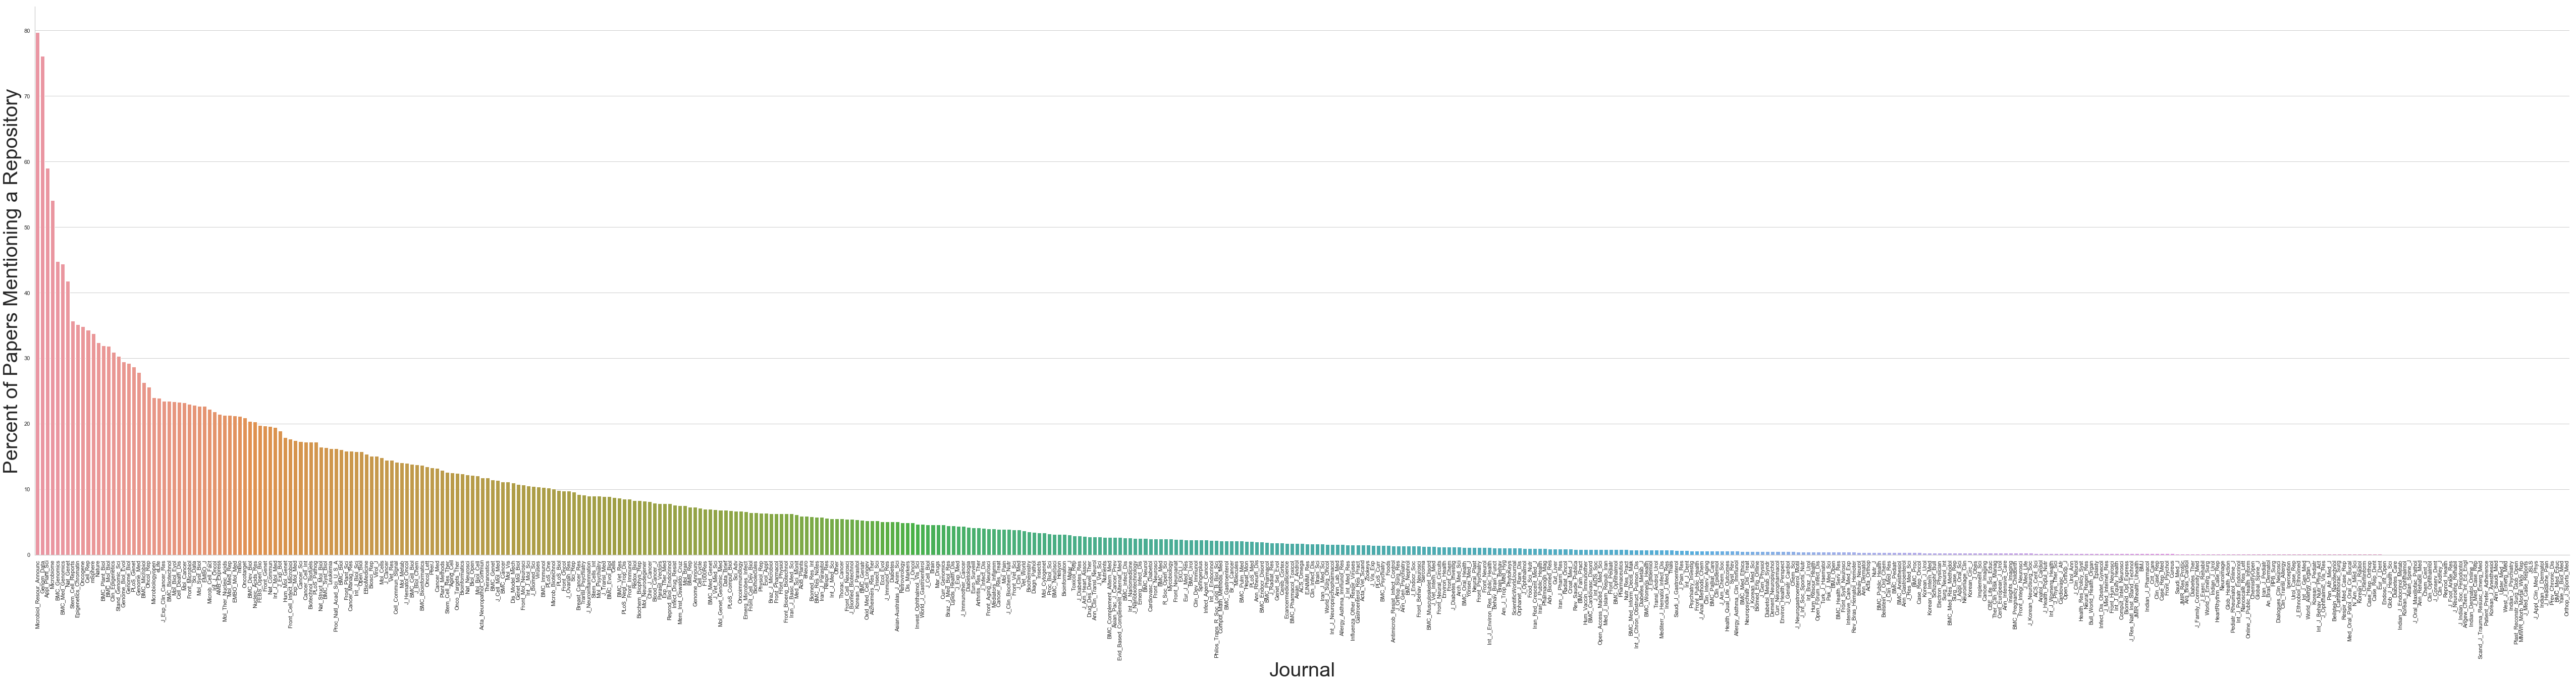

In [27]:
# plot the figure

# make the colors look nice
sns.set(style='whitegrid')

# create axes object
plt.figure(figsize=(90,20))
plt.xticks(rotation=90)
ax = sns.barplot(x='journalName', y='pctRepoPapers', data=mini_df)
sns.despine()

# add axis labels
ax.set_xlabel("Journal", fontsize=40)
ax.set_ylabel("Percent of Papers Mentioning a Repository", fontsize=40)

# get figure objects
fig = ax.get_figure()

# save to .pdf file
fig.savefig('pct_papers_mentioning.pdf', dpi = 200, bbox_inches = 'tight')